In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from graphviz import Source

In [2]:
df_mould = pd.read_csv('Data_without_hand.csv')
df_mould.head(10)

,Unnamed: 0,Timestamp,Z1_mean,Z1_max,Z1_min,Z1_std,Z1_skew,Z1_kurtosis,Z1_peakTopeak,Z1_RMS,...,energy_Signal,spectrum_Mean,spectrum_Std,spectrum_Skew,spectrum_Kur,machine_Status_avg,Temperature_avg,Current_avg,Current_max,Mould_life
0,0,2020/8/6 00:00,0.169920,0.632324,-0.288086,0.056986,0.097843,11.729121,0.920410,0.180677,...,0.029397,84.233139,44.447411,0.761343,2.318339,0.0,35.10,0.0,0,3
1,1,2020/8/6 00:01,0.171129,0.625000,-0.272217,0.054116,0.380044,12.547399,0.897217,0.181634,...,0.030063,83.329951,44.350078,1.070229,9.460321,0.0,35.10,0.0,0,3
2,2,2020/8/6 00:02,0.171056,0.611572,-0.272217,0.054945,0.275383,13.143974,0.883789,0.180369,...,0.029514,81.881146,42.844147,0.623316,0.193594,0.0,35.10,0.0,0,3
3,3,2020/8/6 00:03,0.169828,0.572510,-0.267334,0.057269,0.091348,10.469897,0.839844,0.180933,...,0.029457,84.110317,44.383147,0.848372,3.779865,0.0,35.05,0.0,0,3
4,4,2020/8/6 00:04,0.171111,0.588379,-0.280762,0.053189,0.408062,13.450596,0.869141,0.180843,...,0.029875,81.116312,42.184946,0.705754,0.450981,0.0,35.00,0.0,0,3
5,5,2020/8/6 00:05,0.170881,0.578613,-0.264893,0.053314,0.138687,13.621012,0.843506,0.179977,...,0.029549,81.204617,42.170704,0.599883,0.161436,0.0,35.00,0.0,0,3
6,6,2020/8/6 00:06,0.170905,0.554199,-0.280762,0.053517,0.073969,13.076935,0.834961,0.179814,...,0.029469,81.576251,42.178646,0.575007,0.066649,0.0,35.00,0.0,0,3
7,7,2020/8/6 00:07,0.171073,0.585938,-0.277100,0.055524,0.093572,12.013246,0.863037,0.180230,...,0.029400,84.772820,45.105705,0.693858,0.433453,0.0,35.00,0.0,0,3
8,8,2020/8/6 00:08,0.170987,0.632324,-0.277100,0.055153,0.139478,12.747721,0.909424,0.180380,...,0.029495,87.838060,46.291903,1.106213,11.208931,0.0,35.00,0.0,0,3
9,9,2020/8/6 00:09,0.170975,0.578613,-0.288086,0.053753,0.005012,13.229906,0.866699,0.179601,...,0.029367,86.935540,45.790139,1.098139,10.102192,0.0,35.00,0.0,0,3


In [3]:
df_mould.columns

Index(['Unnamed: 0', 'Timestamp', 'Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std',
       'Z1_skew', 'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur', 'machine_Status_avg', 'Temperature_avg', 'Current_avg',
       'Current_max', 'Mould_life'],
      dtype='object')

In [ ]:
#X有手抄表
X = df_mould[['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat']]
y = df_mould['Mould_life']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=40)

In [ ]:
params = { 'max_depth': 8, 'objective': 'multi:softmax', 'num_class': 10 , 'max_leaf_nodes':5}

In [ ]:
xgbClf = XGBClassifier(params)

In [ ]:
xgbClf.fit(X_train,y_train)

In [ ]:
xgbClf.score(X_test,y_test)

In [ ]:
xgb_pred = xgbClf.predict(X_test)

In [ ]:
xgb.plot_tree(xgbClf)

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(60,30)
xgb.plot_tree(xgbClf,ax = ax)

In [ ]:
fig

In [ ]:
fig.savefig('xgb_tree.png')

In [ ]:
#混沌矩陣
print(confusion_matrix(y_test,xgb_pred))
#分類器數值
print(classification_report(y_test,xgb_pred))

In [4]:
#X無手抄表
X = df_mould[['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur']]
y = df_mould['Mould_life']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=40)

In [6]:
params = { 'max_depth': 8, 'objective': 'multi:softmax', 'num_class': 10 , 'max_leaf_nodes':5}

In [7]:
xgbClf_2 = XGBClassifier(params)

In [8]:
xgbClf_2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
xgbClf_2.score(X_test,y_test)

0.8626543209876543

In [10]:
xgb_pred_2 = xgbClf_2.predict(X_test)

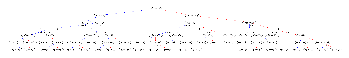

In [11]:
xgb.plot_tree(xgbClf_2)

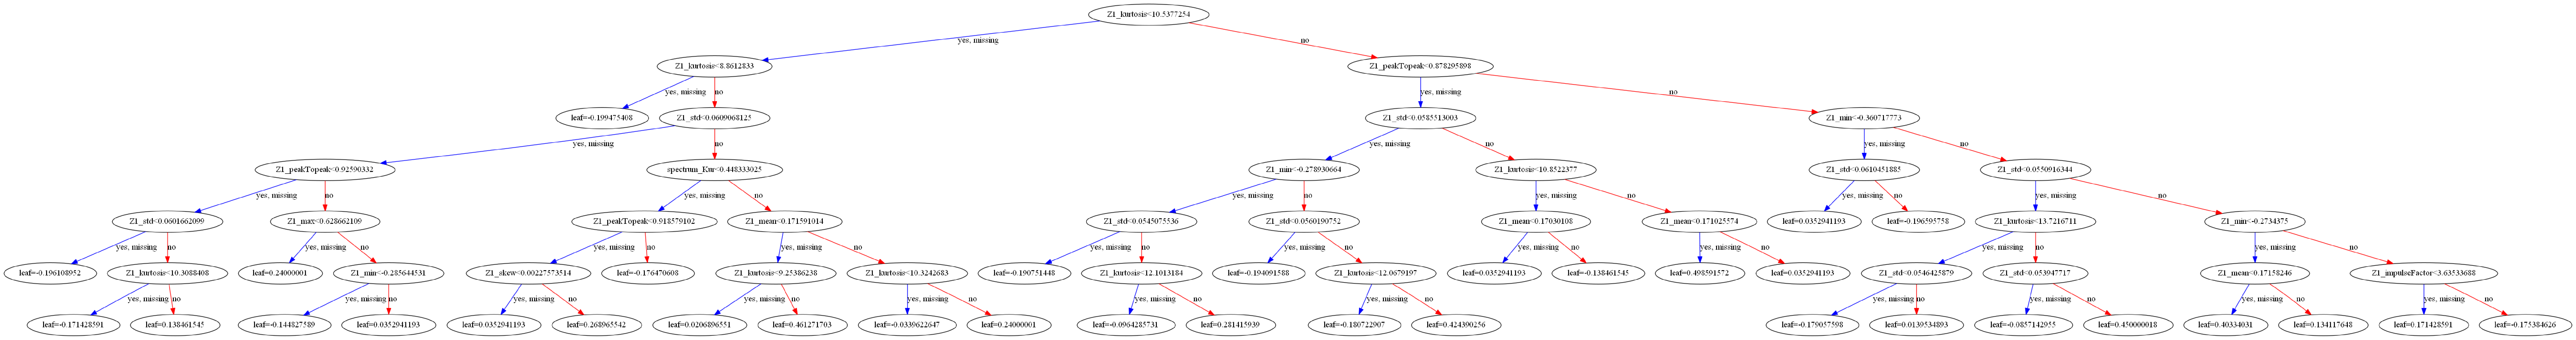

In [12]:
fig,ax = plt.subplots()
fig.set_size_inches(200,100)
xgb.plot_tree(xgbClf_2,ax = ax)

In [13]:
#混沌矩陣
print(confusion_matrix(y_test,xgb_pred_2))
#分類器數值
print(classification_report(y_test,xgb_pred_2))

[[240   1   0  54]
 [  6  29   0  12]
 [  0   5  23  26]
 [ 48   9  17 826]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       295
           1       0.66      0.62      0.64        47
           2       0.57      0.43      0.49        54
           3       0.90      0.92      0.91       900

    accuracy                           0.86      1296
   macro avg       0.74      0.69      0.71      1296
weighted avg       0.86      0.86      0.86      1296



In [ ]:
fig.savefig('xgb_tree.png')